# Sales Report

## Business Overview

## Business Problem

## Data Understanding

###  Data Loading & Inspection

#### Import Relevant Libraries

In [24]:
# Data analysis tools
import pandas as pd
import numpy as np
# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
# Load the dataset 
sales_df = pd.read_csv("sales_data.csv")
# View a random sample of 7 records from the df
sales_df.sample(7)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
914,1027,2023-04-16,Alice,East,8241.57,7,Food,2371.85,2457.29,New,0.03,Cash,Retail,East-Alice
677,1086,2023-05-04,Bob,West,7841.40,25,Food,2248.71,2626.02,New,0.08,Bank Transfer,Online,West-Bob
31,1059,2023-08-31,Alice,North,1203.97,35,Food,3333.64,3764.52,Returning,0.02,Credit Card,Online,North-Alice
417,1013,2023-02-03,Bob,North,6520.20,42,Clothing,4625.33,4642.83,New,0.19,Credit Card,Online,North-Bob
372,1099,2023-10-20,David,South,7859.22,23,Clothing,93.45,181.62,Returning,0.30,Bank Transfer,Retail,South-David
156,1077,2023-02-07,Eve,West,9605.34,12,Clothing,2427.46,2743.09,New,0.29,Credit Card,Retail,West-Eve
359,1048,2023-02-05,David,North,9070.26,42,Electronics,4723.83,5186.19,Returning,0.22,Credit Card,Online,North-David


In [26]:
# Confirm the column names from the column attribute
sales_df.columns


Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [27]:
# Check the shape of the dataframe attribute
sales_df.shape
# Our df has 1000 rows and 14 columns in total

(1000, 14)

In [28]:
# Inspect the information of the df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


**Summary Findings**

1. Our dataset comprises of 4 floats, 2 integers and 8 objects.

2. We do not have any null values as all the counts sum to 1000

In [29]:
# Confirm the descriptive columns
sales_df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


**Summary Findings**

1. Based on the mean, quartile and max statistical data we do not detect any outliers however we shall proceed to confirm this assumption during data cleaning.



#### Data Cleaning

In [30]:
# Check for duplicate values
sales_df.duplicated().sum()

0

In [31]:
# Check for missing values
sales_df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

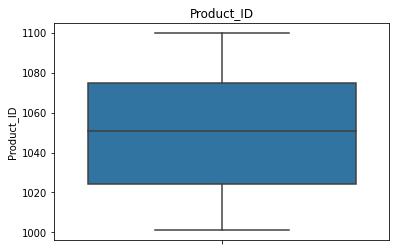

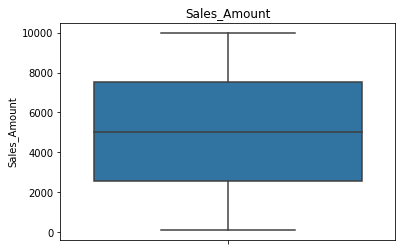

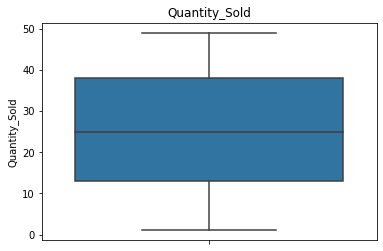

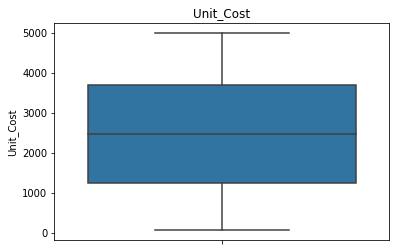

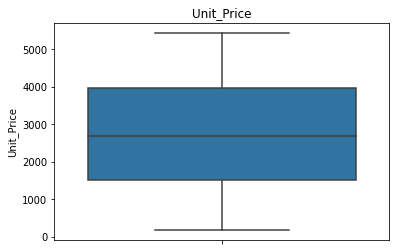

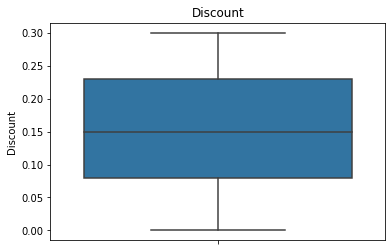

In [41]:
#  Check for Outliers from the statistical columns
#  Visualize the same
numericals = sales_df.select_dtypes(include=['float64', 'int64'])

for col in numericals.columns:
    sns.boxplot(y=numericals[col])
    plt.title(col)
    plt.show();

**Summary Findings**

1. As mentioned earlier from our observations, we have confirmed that we do not have any outliers.